### Student Information
Name: 郭宥成

Student ID: 112033636

GitHub ID: NelsonKuoTW 

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

## Part 1: Take Home Exercises

### Some Necessary Code

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter("ignore") # to ignore every type of warnings.

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import hw_helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
# In this exercise, I use 'isin()' to query those records which category number is 1 or 3. 

X[X['category'].isin([1, 3])]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2242           comp.graphics  
2246  soc.religion.christian  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  

[1183 rows x 3 columns]

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     },
           { 'id': 'G', 'missing_example': int()  }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                
6  G               0

In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
6    False
Name: missing_example, dtype: bool

#### My Answer of Exercise 5

- For `A` and `B`, the `isnull()` function returned `True`, because we assigned np.nan which means an empty numpy array to `A`, and assign nothing to `B`. 
- For `C` and `D`, even they're both contain strings, such as `'NaN'` or `'None'`, these mean empty or missing value to human, but for computers, these are seen as meaningful strings.  
So the `isnull()` function returned `False`.
- For `E`, we assigned None to E, which means nothing so `isnull()` returned `True`.
- For `F`, although we didn't assign any character into the numpy array, but we did defined the type of the data, which would lead `isnull()` to return `False`.  
To confirm this, I only use `int()` to defined the data type in `G`, the `isnull()` function returned `False`, too.


### **>>> Exercise 6 (take home):** 
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

#### My Answer of Exercise 6:

`X_sample` is a subset of `X`, which consists of random 1000 non-repeated elements from `X`. We also can see that the order of `X_sample` is messed up during sampling.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

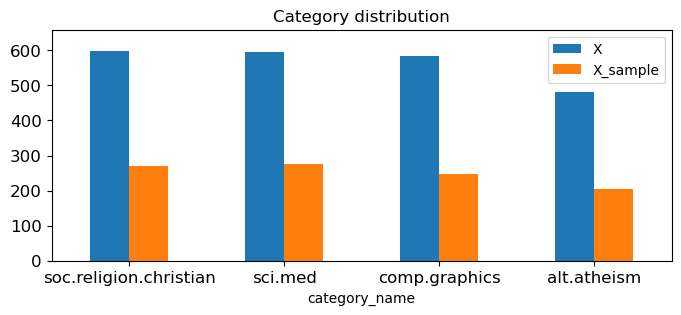

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.plotting.backend = 'matplotlib'

X_sample = X.sample(n=1000, random_state=42)

combine = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
combine.columns = ["X", "X_sample"]
combine.plot(kind = 'bar', title = 'Category distribution', ylim = [0, max(X.category_name.value_counts()) * 1.1],
             rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

The category distribution of sample should meet the original data.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[1])

(2257, 35788)
  (0, 14887)	1
  (0, 31077)	1
  (0, 32493)	4
  (0, 23915)	1
  (0, 32142)	11
  (0, 33597)	1
  (0, 20253)	1
  (0, 12051)	1
  (0, 19458)	1
  (0, 23610)	8
  (0, 18268)	2
  (0, 35312)	1
  (0, 5195)	3
  (0, 18474)	10
  (0, 32270)	3
  (0, 32135)	1
  (0, 17556)	2
  (0, 5046)	2
  (0, 22366)	1
  (0, 33267)	1
  (0, 12626)	1
  (0, 5062)	1
  (0, 11001)	1
  (0, 16418)	3
  (0, 30464)	1
  :	:
  (0, 34992)	1
  (0, 32164)	1
  (0, 18551)	2
  (0, 24079)	1
  (0, 5549)	1
  (0, 34987)	1
  (0, 12817)	1
  (0, 32945)	1
  (0, 27438)	1
  (0, 6939)	1
  (0, 16908)	1
  (0, 32271)	1
  (0, 12103)	1
  (0, 23870)	1
  (0, 32202)	1
  (0, 4687)	1
  (0, 30194)	1
  (0, 12065)	1
  (0, 5304)	1
  (0, 15319)	1
  (0, 18465)	1
  (0, 16999)	1
  (0, 30701)	1
  (0, 9839)	1
  (0, 11944)	1


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [8]:
for i in range(100):
    if(X_counts[4, i]): print(count_vect.get_feature_names_out()[i])


00
01


The second 1 is '01'.

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

['doc_346', 'doc_2000', 'doc_1885', 'doc_1396', 'doc_1912', 'doc_1485', 'doc_1602', 'doc_367', 'doc_1806', 'doc_2023', 'doc_118', 'doc_1089', 'doc_667', 'doc_747', 'doc_1274', 'doc_418', 'doc_1555', 'doc_2105', 'doc_286', 'doc_659']
['term_the', 'term_of', 'term_to', 'term_and', 'term_in', 'term_that', 'term_is', 'term_it', 'term_edu', 'term_from', 'term_you', 'term_com', 'term_not', 'term_for', 'term_are', 'term_we', 'term_or', 'term_was', 'term_on', 'term_as']
[[4, 3, 3, 3, 3, 2, 3, 1, 4, 2, 0, 0, 2, 2, 0, 0, 0, 0, 3, 2], [8, 7, 14, 17, 6, 12, 12, 8, 3, 1, 3, 0, 2, 2, 9, 3, 2, 2, 4, 0], [30, 20, 13, 9, 6, 3, 4, 4, 0, 3, 14, 2, 7, 6, 3, 0, 9, 5, 0, 4], [13, 8, 4, 2, 1, 4, 0, 0, 5, 1, 5, 0, 0, 1, 1, 1, 0, 0, 2, 0], [7, 6, 3, 5, 2, 5, 2, 2, 4, 1, 3, 3, 0, 1, 0, 3, 0, 0, 6, 0], [3, 2, 2, 4, 3, 2, 7, 9, 4, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 4], [0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [1, 1, 2, 1, 1, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [3, 2, 3, 3, 3, 2, 3, 2, 0,

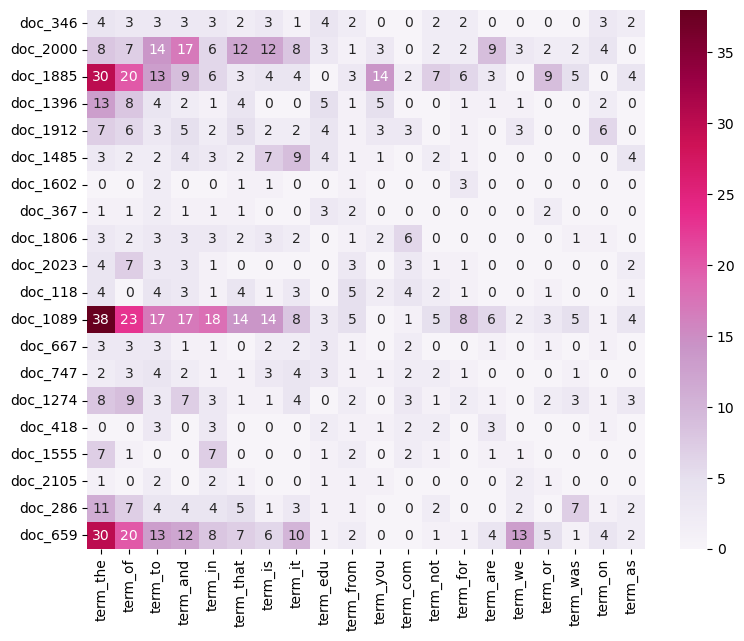

In [9]:
# Answer here
"""
I would select those words that have top 20 apearance as the x-axis to plot. 
For the y-axis, I would either random pick 20 docs to plot or random pick 5 docs from each of the 4 categories to plot.
Try to visualize the differenence of each genre.

"""

doc_sample = pd.DataFrame()
for i in range(4): # each categories
    doc_sample = pd.concat([doc_sample, X[X['category'] == i].sample(n = 5, random_state=42)]) # sample 5 from each categories

plot_y = ["doc_"+ str(i) for i in doc_sample.index]
print(plot_y)

term_frequencies = [0 for _ in range(X_counts.shape[1])]
for i in doc_sample.index:
    for j in range(X_counts.shape[1]):
        term_frequencies[j] += X_counts[i, j] # counting the appearence of every words within 20 samples

term_frequencies = np.array(term_frequencies) 
sort = np.argsort(-term_frequencies) # sorting by the appearance
term_frequencies = term_frequencies[sort]

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sort]][0:20] # top 20 appearance
print(plot_x)

plot_z = [[0 for _ in range(20)] for _ in range(20)]
for i in range(20):
    for j in range(20):
        plot_z[j][i] = X_counts[doc_sample.index[j], sort[i]]
print(plot_z)

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=np.amax(plot_z), annot=True)

I found out that the type of those top 20 appearance words are always article, auxiliary verb, pronoun, counjuction or preposition. 
May not meaningful enough to visualize the difference between categories.

### **>>> Exercise 12 (take home):** 
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 35788)
(2257, 3)


<Figure size 1600x320 with 0 Axes>

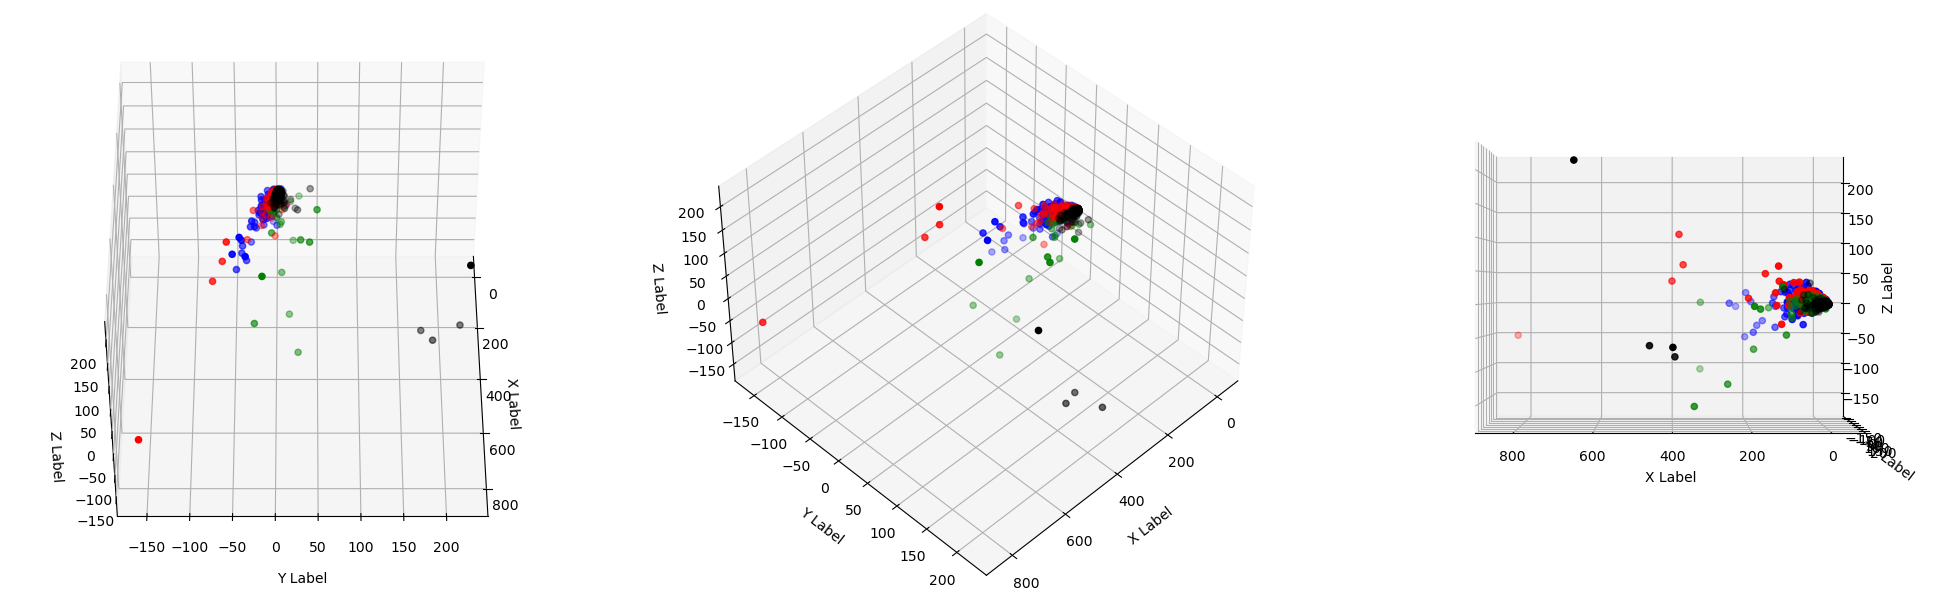

'\n\nBy these 3 plots below, actually a lot of dots are grouping together, just like the 2D plot showed, but we can simply find out that at the Y-axis, the order is red, blue, green and black.\nMean that we can classify 4 category roughly by their distribution on the Y-axis, the order from smaller y to larger y is: alt.atheism -> soc.religion.christian -> sci.med -> comp.graphics. \n\n'

In [10]:
# Answer here

from sklearn.decomposition import PCA

print(X_counts.shape)
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced3.shape)

col = ['red', 'blue', 'black', 'green']

# plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = plt.figaspect(0.2))
fig = plt.figure(figsize = (25, 10))

ax = fig.add_subplot(1, 3, 1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, zdir='z', s=20, c=c, depthshade=True)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(45, 0)

ax = fig.add_subplot(1, 3, 2, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, zdir='z', s=20, c=c, depthshade=True)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(45, 45)

ax = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, zdir='z', s=20, c=c, depthshade=True)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(0, 90)

plt.show()

"""

By these 3 plots below, actually a lot of dots are grouping together, just like the 2D plot showed, but we can simply find out that at the Y-axis, the order is red, blue, green and black.
Mean that we can classify 4 category roughly by their distribution on the Y-axis, the order from smaller y to larger y is: alt.atheism -> soc.religion.christian -> sci.med -> comp.graphics. 

"""

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [11]:
print(X_reduced3)
df3 = pd.DataFrame(X_reduced3, columns=['X', 'Y', 'Z'])
df3['category'] = X['category']
print(df3)

[[-17.01172954   0.45016637  -1.31226076]
 [ -6.80574586  -1.15880601  -0.40488279]
 [ 15.79461065   3.62233099  12.70799059]
 ...
 [ 19.97508176  -2.85495807   1.04076595]
 [163.88523745  29.52467718  -8.70178705]
 [-16.58569528   0.61748552  -1.88007226]]
               X          Y          Z  category
0     -17.011730   0.450166  -1.312261         1
1      -6.805746  -1.158806  -0.404883         1
2      15.794611   3.622331  12.707991         3
3     -16.249315   0.380305  -3.459285         3
4      -8.928386   0.161678  -2.210843         3
...          ...        ...        ...       ...
2252  -20.045665   2.062264  -2.225513         2
2253   77.385803   4.424340 -22.667099         2
2254   19.975082  -2.854958   1.040766         2
2255  163.885237  29.524677  -8.701787         2
2256  -16.585695   0.617486  -1.880072         2

[2257 rows x 4 columns]


In [12]:
# Answer here
import plotly.express as px
pd.options.plotting.backend='plotly'
fig = px.scatter_3d(df3, x = 'X', y = 'Y', z = 'Z', color = 'category')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [13]:
"""
By the following exercise, I am going to plot those term frequency larger than 200 but smaller than 500. By reducing the number of terms, to visualize the distribution more clearly.

"""

term_frequencies = []
print(X_counts.shape[1])
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

35788


267


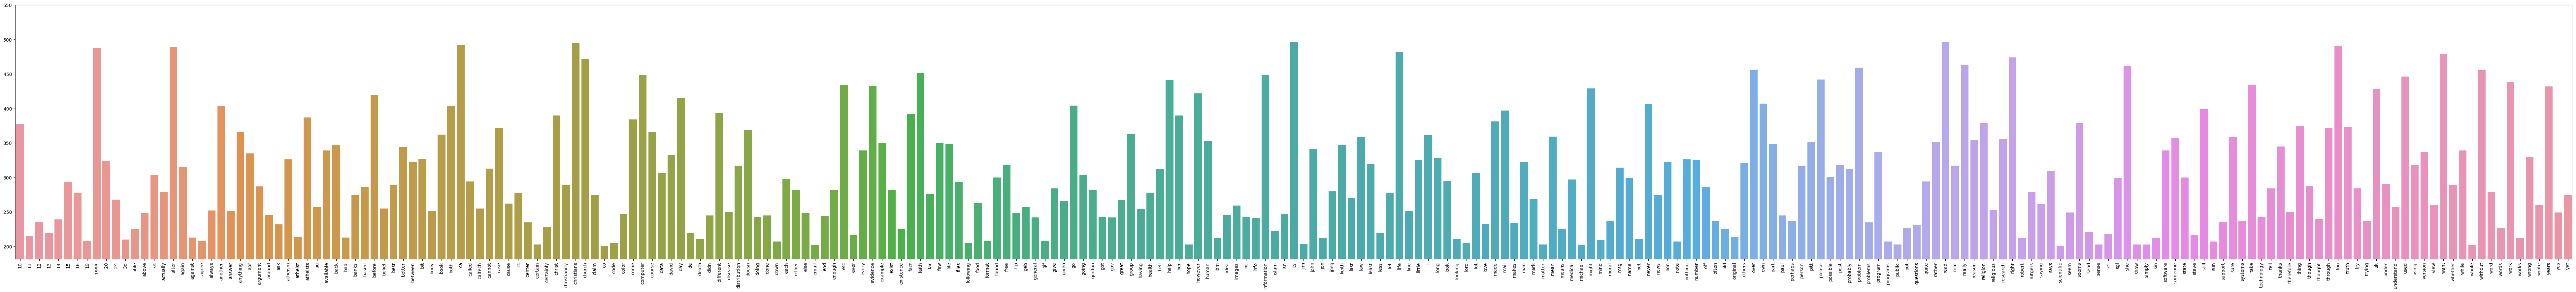

In [14]:
survivor_index = np.intersect1d(np.where(term_frequencies <500), np.where(term_frequencies >= 200))
survivor = term_frequencies[survivor_index]

print(len(survivor))

fig, ax = plt.subplots(figsize=(100, 10))
sns.barplot(x=count_vect.get_feature_names_out()[survivor_index], 
            y=survivor, ax=ax)
ax.set_xticklabels(count_vect.get_feature_names_out()[survivor_index], rotation = 90);
ax.set_ylim(200/1.1, 500*1.1)

plt.show()

I also change the starting value of y-axis to 200 / 1.1, let the figure more representive.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

[29825 17660 17222 ...     1     1     1]


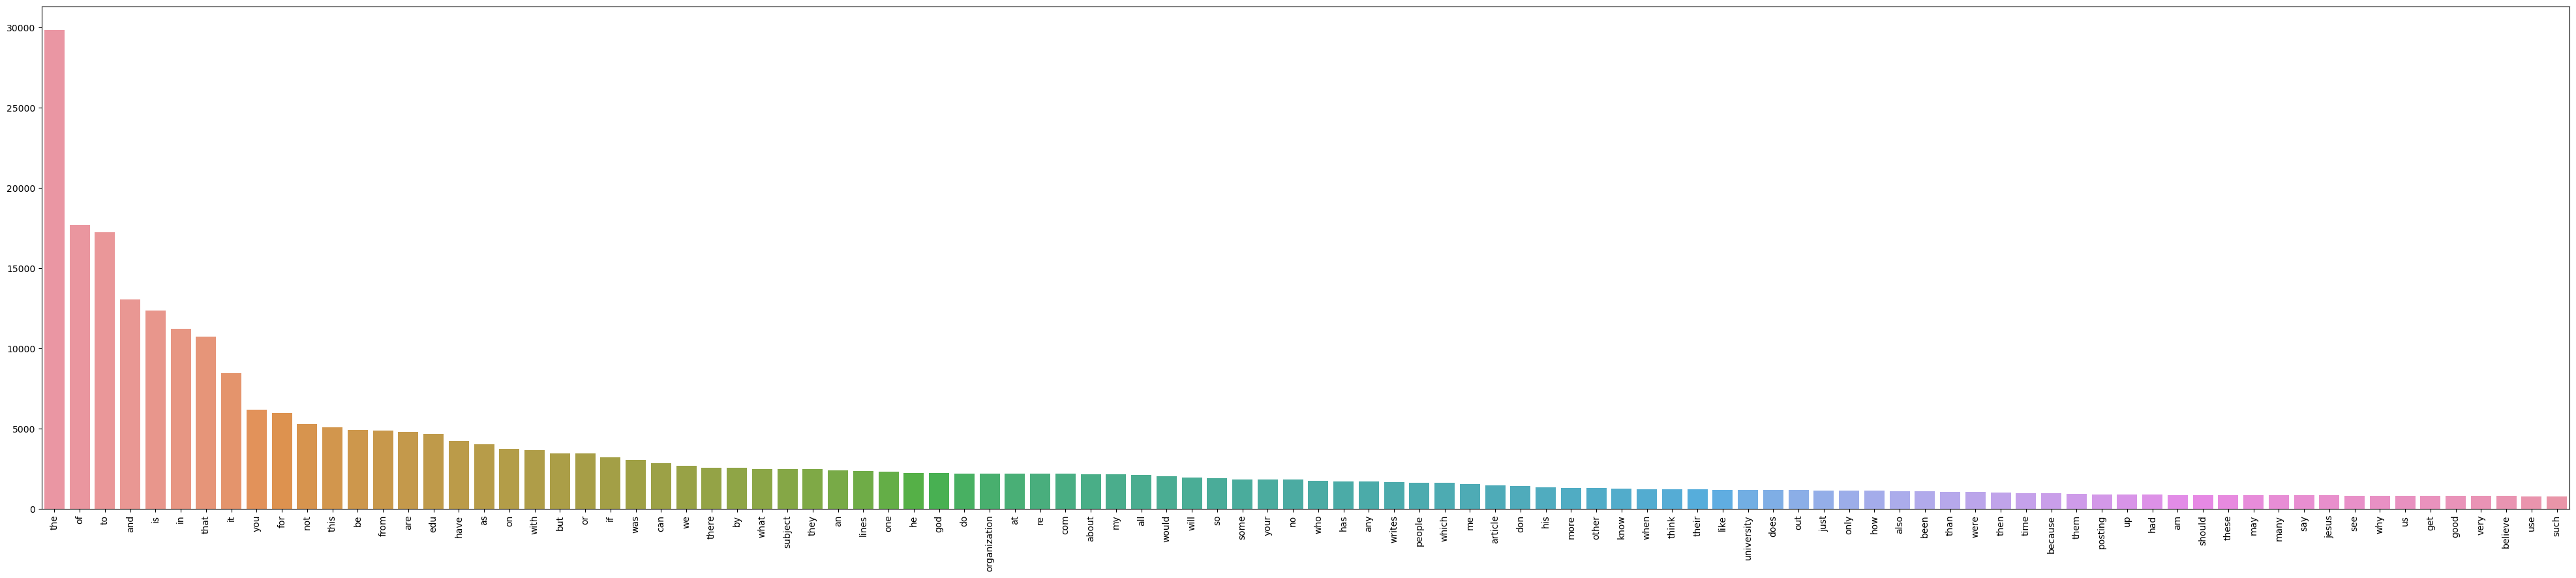

In [15]:
# Answer here

sort = np.argsort(-term_frequencies)
sortedx = count_vect.get_feature_names_out()[sort]
sortedy = term_frequencies[sort]
print(sortedy)
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=sortedx[:100], 
            y=sortedy[:100])
g.set_xticklabels(sortedx[:100], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [16]:
# Answer here

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X.category_name)
X['bin_category'] = mlb2.transform(X['category_name']).tolist()
X[0:15]

# It does work!

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   

             category_name  bin_category  
0            comp.graphics  [0, 1, 0, 0]  
1            comp.graphics  [0, 1, 0, 0]  
2   soc.religion.christian  [0, 0, 0, 1]  
3   soc.religion.christian  [0, 0, 0, 1]  
4   soc.religion.christian  [0, 0, 0, 1]  
5   soc.religion.christian  [0, 0, 0, 1]  
6   soc.religion.christian  [0, 0, 0, 1]  
7                  sci.med  [0, 0, 1, 0]  
8                  sci.med  [0, 0, 1, 0]  
9                  sci.med  [0, 0, 1, 0]  
10  soc.religion.christian  [0, 0, 0, 1]  
11           comp.graphics  [0, 1, 0, 0]  
12             alt.atheism  [1, 0, 0, 0]  
13             alt.atheism  [1, 0, 0, 0]  
14           comp.graphics  [0, 1, 0, 0]

## Part 2: Processing the New Dataset

## 1. The Data
Skip


## 2. Data Preparation
In the following part I will load the data from 3 different files then merge them together, in order to further operation and analysis.

In [17]:
columns=["comment", "category"]

imdb = pd.read_table("sentiment labelled sentences/imdb_labelled.txt", header = None,names = columns, delimiter = ' \t', engine = 'python')
amazon_cells = pd.read_table("sentiment labelled sentences/amazon_cells_labelled.txt", header = None,names = columns, delimiter = '\t', engine = 'python')
yelp = pd.read_table("sentiment labelled sentences/yelp_labelled.txt", header = None,names = columns, delimiter = '\t', engine = 'python')


print(len(imdb), len(amazon_cells), len(yelp)) # make sure all containing 1000 comments.

imdb['source'] = "imdb"
amazon_cells['source'] = "amazon_cells"
yelp['source'] = "yelp"

merged_dataset = pd.concat([imdb, amazon_cells, yelp], ignore_index = True) # merge all comments together.
merged_dataset

1000 1000 1000


comment  category source
0     A very, very, very slow-moving, aimless movie ...         0   imdb
1     Not sure who was more lost - the flat characte...         0   imdb
2     Attempting artiness with black & white and cle...         0   imdb
3           Very little music or anything to speak of.          0   imdb
4     The best scene in the movie was when Gerardo i...         1   imdb
...                                                 ...       ...    ...
2995  I think food should have flavor and texture an...         0   yelp
2996                           Appetite instantly gone.         0   yelp
2997  Overall I was not impressed and would not go b...         0   yelp
2998  The whole experience was underwhelming, and I ...         0   yelp
2999  Then, as if I hadn't wasted enough of my life ...         0   yelp

[3000 rows x 3 columns]

Let's take at look some of the records that are contained in our subset of the data

In [18]:
merged_dataset[0:2]

comment  category source
0  A very, very, very slow-moving, aimless movie ...         0   imdb
1  Not sure who was more lost - the flat characte...         0   imdb

In [19]:
merged_dataset.source

0       imdb
1       imdb
2       imdb
3       imdb
4       imdb
        ... 
2995    yelp
2996    yelp
2997    yelp
2998    yelp
2999    yelp
Name: source, Length: 3000, dtype: object

In [20]:
len(merged_dataset)

3000

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

### 3.1 Converting Dictionary into Pandas Dataframe
Data is already formed in pandas dataframe, skip this part.

### 3.2 Familiarizing yourself with the Data

In [21]:
# a simple query
merged_dataset[:10][["comment","category"]]

comment  category
0  A very, very, very slow-moving, aimless movie ...         0
1  Not sure who was more lost - the flat characte...         0
2  Attempting artiness with black & white and cle...         0
3        Very little music or anything to speak of.          0
4  The best scene in the movie was when Gerardo i...         1
5  The rest of the movie lacks art, charm, meanin...         0
6                                 Wasted two hours.          0
7  Saw the movie today and thought it was a good ...         1
8                                A bit predictable.          0
9  Loved the casting of Jimmy Buffet as the scien...         1

In [22]:
merged_dataset[-10:]

comment  category source
2990  The refried beans that came with my meal were ...         0   yelp
2991         Spend your money and time some place else.         0   yelp
2992  A lady at the table next to us found a live gr...         0   yelp
2993            the presentation of the food was awful.         0   yelp
2994           I can't tell you how disappointed I was.         0   yelp
2995  I think food should have flavor and texture an...         0   yelp
2996                           Appetite instantly gone.         0   yelp
2997  Overall I was not impressed and would not go b...         0   yelp
2998  The whole experience was underwhelming, and I ...         0   yelp
2999  Then, as if I hadn't wasted enough of my life ...         0   yelp

In [23]:
merged_dataset.loc[:10, 'comment']

0     A very, very, very slow-moving, aimless movie ...
1     Not sure who was more lost - the flat characte...
2     Attempting artiness with black & white and cle...
3           Very little music or anything to speak of. 
4     The best scene in the movie was when Gerardo i...
5     The rest of the movie lacks art, charm, meanin...
6                                    Wasted two hours. 
7     Saw the movie today and thought it was a good ...
8                                   A bit predictable. 
9     Loved the casting of Jimmy Buffet as the scien...
10                  And those baby owls were adorable. 
Name: comment, dtype: object

In [24]:
merged_dataset.iloc[:10, 0]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3          Very little music or anything to speak of. 
4    The best scene in the movie was when Gerardo i...
5    The rest of the movie lacks art, charm, meanin...
6                                   Wasted two hours. 
7    Saw the movie today and thought it was a good ...
8                                  A bit predictable. 
9    Loved the casting of Jimmy Buffet as the scien...
Name: comment, dtype: object

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [25]:
merged_dataset.isnull()

comment  category  source
0       False     False   False
1       False     False   False
2       False     False   False
3       False     False   False
4       False     False   False
...       ...       ...     ...
2995    False     False   False
2996    False     False   False
2997    False     False   False
2998    False     False   False
2999    False     False   False

[3000 rows x 3 columns]

In [26]:
merged_dataset.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   0

The result shows that there is no missing value in this dataset.

### 4.2 Dealing with Duplicate Data

In [27]:
merged_dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [28]:
sum(merged_dataset.duplicated())

17

There is 17 duplicated data, need to deal with this.

In [29]:
merged_dataset.drop_duplicates(keep = "first", inplace = True, ignore_index = True) 
len(merged_dataset)

2983

change `keep = 'first'` from `keep = False` to keep one of the duplicated data.

## 5.  Data Preprocessing

### 5.1 Sampling

In [30]:
print(merged_dataset.shape)
merged_dataset_sample = merged_dataset.sample(n = 1000, random_state = 42) #random state
display(merged_dataset_sample)

(2983, 3)


comment  category  \
2410  We've tried to like this place but after 10+ t...         0   
1547  I give Wirefly 1 star.I will contact Cingular/...         0   
881   This is probably one of the least effective an...         0   
331   For those that haven't seen it, don't waste yo...         0   
1837                     Not good enough for the price.         0   
...                                                 ...       ...   
916   Characters are one-dimensional, even the good ...         0   
1211                                      fast service.         1   
2711                         Awesome selection of beer.         1   
2457                                 Very good, though!         1   
2887                         -My order was not correct.         0   

            source  
2410          yelp  
1547  amazon_cells  
881           imdb  
331           imdb  
1837  amazon_cells  
...            ...  
916           imdb  
1211  amazon_cells  
2711          yelp  
2457          yelp  
2887          yelp  

[1000 rows x 3 columns]

source
imdb            997
yelp            996
amazon_cells    990
Name: count, dtype: int64


<Axes: title={'center': 'Source distribution'}, xlabel='source'>

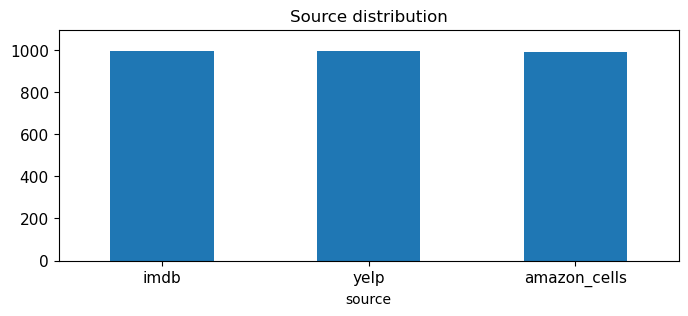

In [31]:
pd.options.plotting.backend = 'matplotlib'

print(merged_dataset.source.value_counts())

# plot barchart for X
merged_dataset.source.value_counts().plot(kind = 'bar',
                                    title = 'Source distribution',
                                    ylim = [0, max(merged_dataset.source.value_counts()) * 1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category
0    1493
1    1490
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category'>

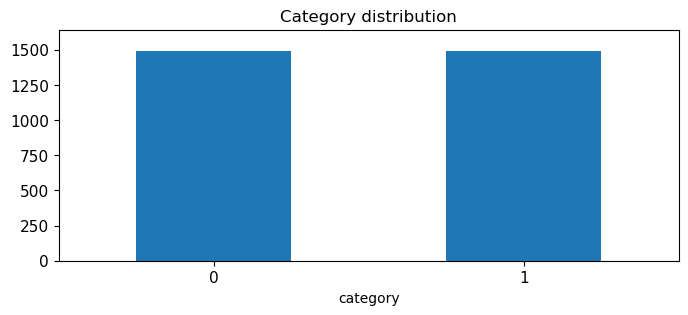

In [32]:
print(merged_dataset.category.value_counts())

# plot barchart for X
merged_dataset.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, max(merged_dataset.category.value_counts()) * 1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

The positive/negative is evenly distributed.

source
imdb            997
yelp            996
amazon_cells    990
Name: count, dtype: int64
source
imdb            347
yelp            332
amazon_cells    321
Name: count, dtype: int64


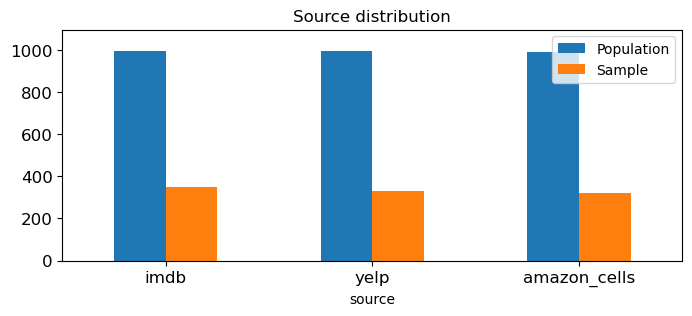

In [33]:
#Answer here
print(merged_dataset.source.value_counts())
print(merged_dataset_sample.source.value_counts())
combine = pd.concat([merged_dataset.source.value_counts(), merged_dataset_sample.source.value_counts()], axis=1)
combine.columns = ["Population", "Sample"]
combine.plot(kind = 'bar', title = 'Source distribution', ylim = [0, max(merged_dataset.source.value_counts()) * 1.1],
             rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

category
0    1493
1    1490
Name: count, dtype: int64
category
0    504
1    496
Name: count, dtype: int64


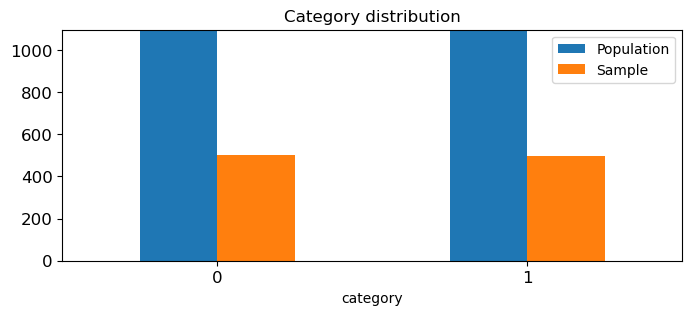

In [34]:
print(merged_dataset.category.value_counts())
print(merged_dataset_sample.category.value_counts())

combine = pd.concat([merged_dataset.category.value_counts(), merged_dataset_sample.category.value_counts()], axis=1)
combine.columns = ["Population", "Sample"]
combine.plot(kind = 'bar', title = 'Category distribution', ylim = [0, max(merged_dataset.source.value_counts()) * 1.1],
             rot = 0, fontsize = 12, figsize = (8,3))
plt.show()

The category distribution of sample should meet the original data.

### 5.2 Feature Creation

In [35]:
import nltk
nltk.download('punkt')

merged_dataset['unigrams'] = merged_dataset['comment'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\112033636\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
merged_dataset[0:4]

comment  category source  \
0  A very, very, very slow-moving, aimless movie ...         0   imdb   
1  Not sure who was more lost - the flat characte...         0   imdb   
2  Attempting artiness with black & white and cle...         0   imdb   
3        Very little music or anything to speak of.          0   imdb   

                                            unigrams  
0  [A, very, ,, very, ,, very, slow-moving, ,, ai...  
1  [Not, sure, who, was, more, lost, -, the, flat...  
2  [Attempting, artiness, with, black, &, white, ...  
3  [Very, little, music, or, anything, to, speak,...

In [37]:
merged_dataset[0:4]["unigrams"]

0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [38]:
list(merged_dataset[0:1]['unigrams'])

[['A',
  'very',
  ',',
  'very',
  ',',
  'very',
  'slow-moving',
  ',',
  'aimless',
  'movie',
  'about',
  'a',
  'distressed',
  ',',
  'drifting',
  'young',
  'man',
  '.']]

### 5.3 Feature subset selection

In [39]:
count_vect = CountVectorizer()
merged_dataset_counts = count_vect.fit_transform(merged_dataset.comment) #learn the vocabulary and return document-term matrix
print(merged_dataset_counts.shape)
print(merged_dataset_counts[0])

(2983, 5155)
  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1


In [40]:
count_vect.get_feature_names_out()[4890]

'very'

In [41]:
count_vect.get_feature_names_out()[4133]

'slow'

In [42]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [43]:
merged_dataset_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0

term_00  term_10  term_100  term_11  term_12  term_13  term_15  \
doc_0         0        0         0        0        0        0        0   
doc_1         0        0         0        0        0        0        0   
doc_2         0        0         0        0        0        0        0   
doc_3         0        0         0        0        0        0        0   
doc_4         0        0         0        0        0        0        0   
doc_5         0        0         0        0        0        0        0   
doc_6         0        0         0        0        0        0        0   
doc_7         0        0         0        0        0        0        0   
doc_8         0        0         0        0        0        0        0   
doc_9         0        0         0        0        0        0        0   
doc_10        0        0         0        0        0        0        0   
doc_11        0        0         0        0        0        0        0   
doc_12        0        0         0        0        0        0        0   
doc_13        0        0         0        0        0        0        0   
doc_14        0        0         0        0        0        0        0   
doc_15        0        0         0        0        0        0        0   
doc_16        0        0         0        0        0        0        0   
doc_17        0        0         0        0        0        0        0   
doc_18        0        0         0        0        0        0        0   
doc_19        0        0         0        0        0        0        0   

        term_15g  term_15pm  term_17  term_18  term_18th  term_1928  \
doc_0          0          0        0        0          0          0   
doc_1          0          0        0        0          0          0   
doc_2          0          0        0        0          0          0   
doc_3          0          0        0        0          0          0   
doc_4          0          0        0        0          0          0   
doc_5          0          0        0        0          0          0   
doc_6          0          0        0        0          0          0   
doc_7          0          0        0        0          0          0   
doc_8          0          0        0        0          0          0   
doc_9          0          0        0        0          0          0   
doc_10         0          0        0        0          0          0   
doc_11         0          0        0        0          0          0   
doc_12         0          0        0        0          0          0   
doc_13         0          0        0        0          0          0   
doc_14         0          0        0        0          0          0   
doc_15         0          0        0        0          0          0   
doc_16         0          0        0        0          0          0   
doc_17         0          0        0        0          0          0   
doc_18         0          0        0        0          0          0   
doc_19         0          0        0        0          0          0   

        term_1947  term_1948  term_1949  term_1971  term_1973  term_1979  \
doc_0           0          0          0          0          0          0   
doc_1           0          0          0          0          0          0   
doc_2           0          0          0          0          0          0   
doc_3           0          0          0          0          0          0   
doc_4           0          0          0          0          0          0   
doc_5           0          0          0          0          0          0   
doc_6           0          0          0          0          0          0   
doc_7           0          0          0          0          0          0   
doc_8           0          0          0          0          0          0   
doc_9           0          0          0          0          0          0   
doc_10          0          0          0          0          0          0   
doc_11          0          0          0          

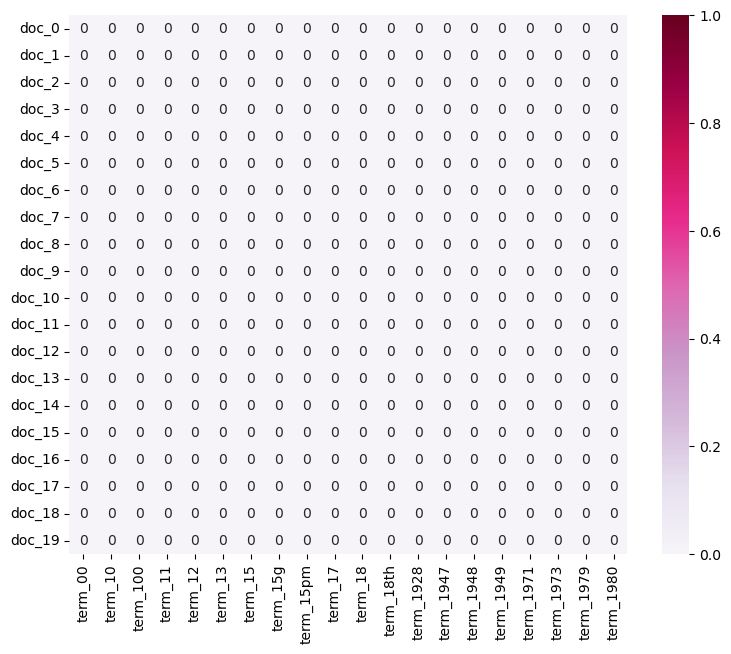

In [44]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

plot_y = ["doc_"+ str(i) for i in list(merged_dataset.index)[0:20]]
print(plot_y)

plot_z = merged_dataset_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


The counts matrix is so sparse, need to change another representation.

['doc_1908', 'doc_1822', 'doc_2773', 'doc_1974', 'doc_1923', 'doc_1135', 'doc_917', 'doc_551', 'doc_600', 'doc_456', 'doc_1868', 'doc_658', 'doc_627', 'doc_1524', 'doc_859', 'doc_2164', 'doc_875', 'doc_2705', 'doc_500', 'doc_2905']
['term_the', 'term_and', 'term_my', 'term_it', 'term_to', 'term_is', 'term_was', 'term_in', 'term_on', 'term_of', 'term_this', 'term_with', 'term_out', 'term_movie', 'term_had', 'term_not', 'term_bad', 'term_easily', 'term_phone', 'term_coverage']
[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], [3, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0], [0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0

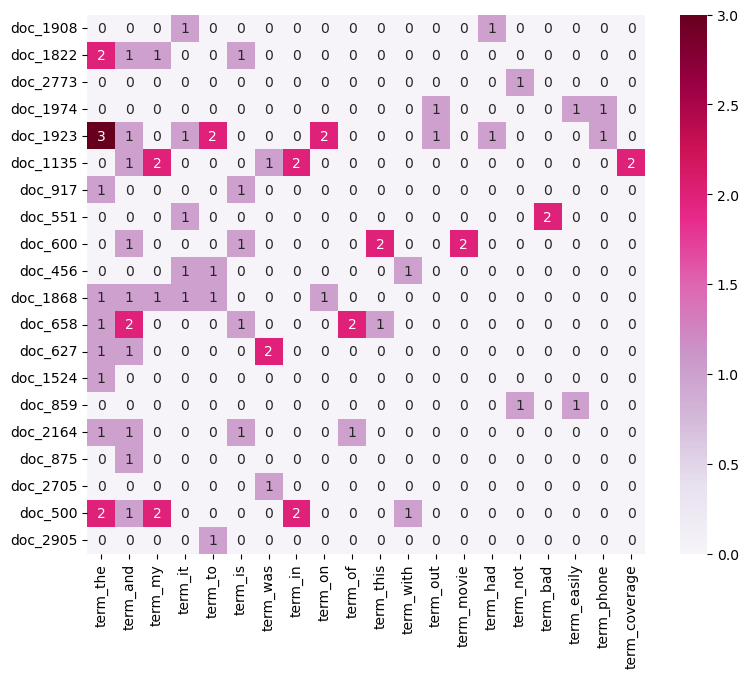

In [45]:
doc_sample = pd.DataFrame()

doc_sample = pd.concat([doc_sample, merged_dataset[merged_dataset['category'] == 0].sample(n = 10, random_state=42)]) # sample 7 from each categories
doc_sample = pd.concat([doc_sample, merged_dataset[merged_dataset['category'] == 1].sample(n = 10, random_state=42)])


plot_y = ["doc_"+ str(i) for i in doc_sample.index]
print(plot_y)

term_frequencies = [0 for _ in range(merged_dataset_counts.shape[1])]
for i in doc_sample.index:
    for j in range(merged_dataset_counts.shape[1]):
        term_frequencies[j] += merged_dataset_counts[i, j] # counting the appearence of every words within 20 samples

term_frequencies = np.array(term_frequencies) 
sort = np.argsort(-term_frequencies) # sorting by the appearance
term_frequencies = term_frequencies[sort]

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[sort]][0:20] # top 20 appearance
print(plot_x)

plot_z = [[0 for _ in range(20)] for _ in range(20)]
for i in range(20):
    for j in range(20):
        plot_z[j][i] = merged_dataset_counts[doc_sample.index[j], sort[i]]
print(plot_z)

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=np.amax(plot_z), annot=True)

The figure above choose 10 random comments from each category and the x-axis is formed by those words that have top 20 appearance.

### 5.4 Dimensionality Reduction

In [46]:
print(merged_dataset_counts.shape)
merged_dataset_reduced = PCA(n_components = 2).fit_transform(merged_dataset_counts.toarray())
print(merged_dataset_reduced.shape)

(2983, 5155)
(2983, 2)


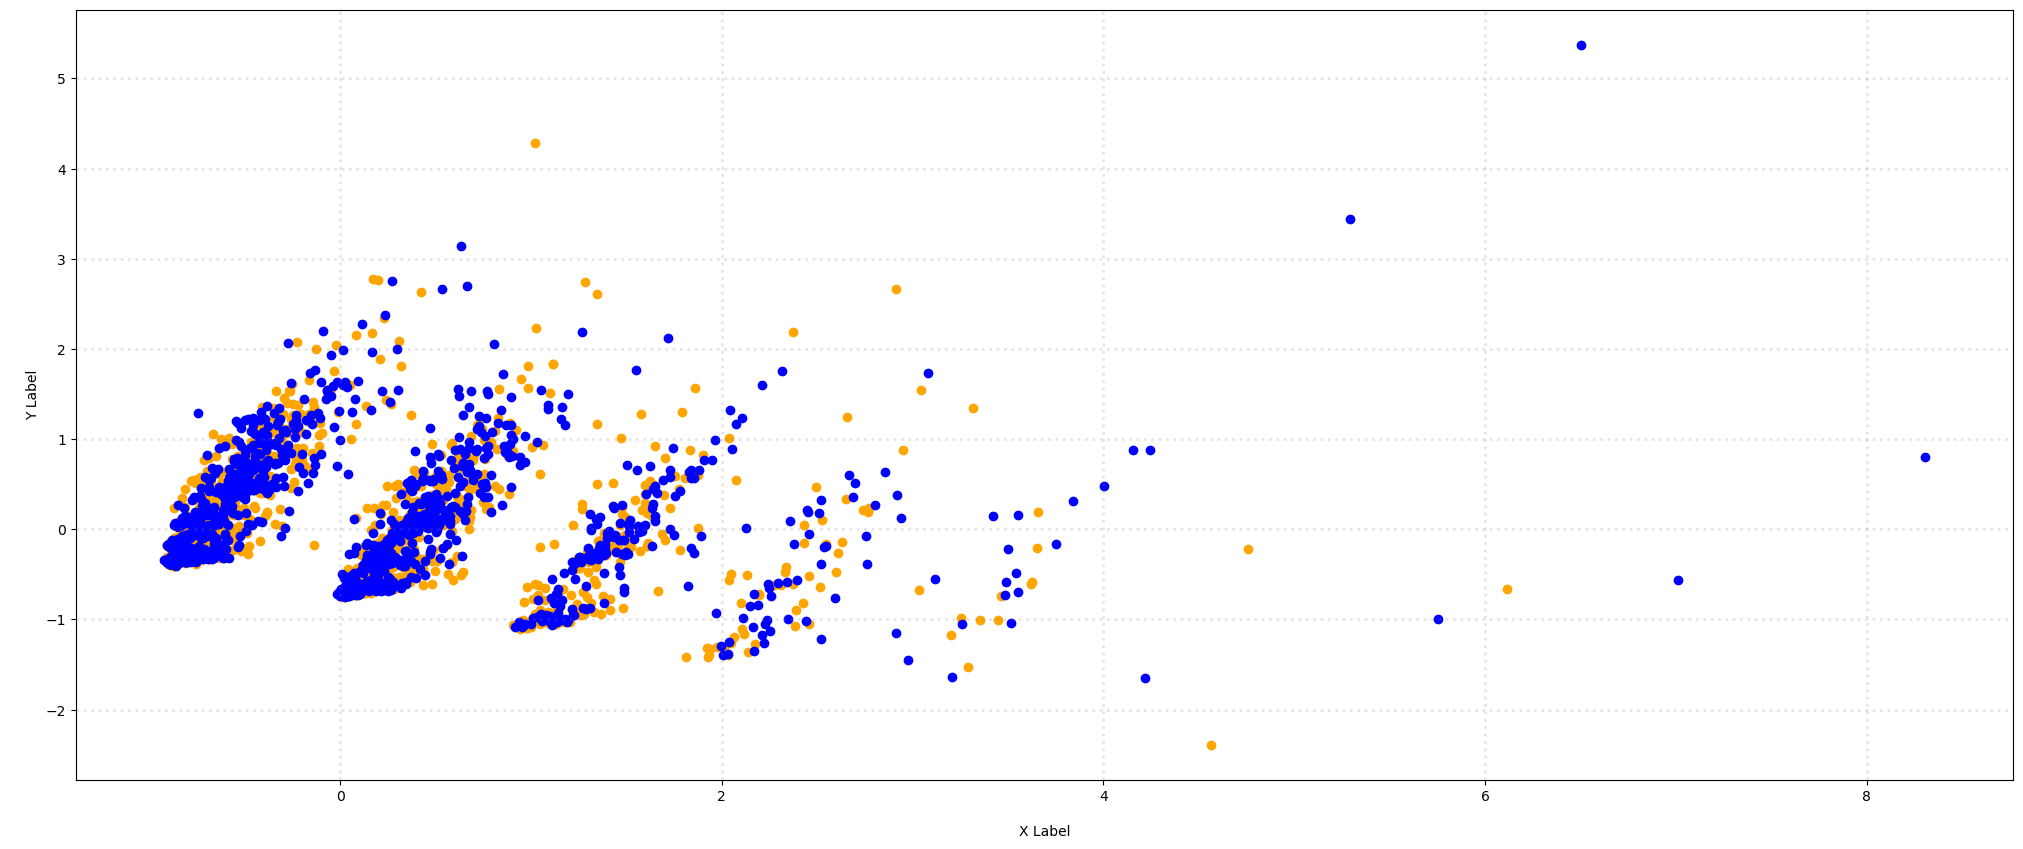

In [47]:
col = ['orange', 'blue']
emo_type = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, emo in zip(col, emo_type):
    xs = merged_dataset_reduced[merged_dataset['category'] == emo].T[0]
    ys = merged_dataset_reduced[merged_dataset['category'] == emo].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(2983, 3)


<Figure size 1600x320 with 0 Axes>

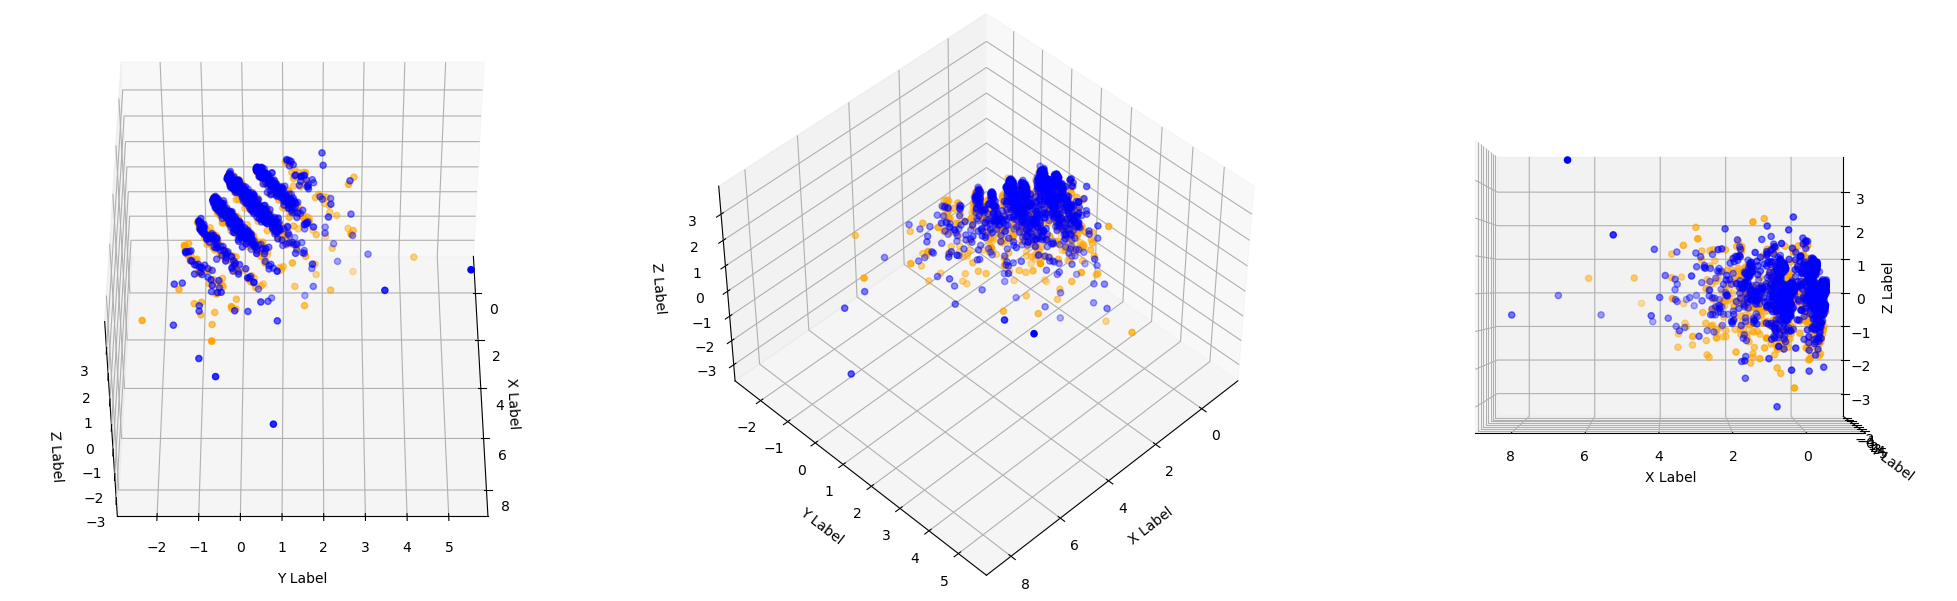

In [48]:
# Answer here

merged_dataset_reduced3 = PCA(n_components = 3).fit_transform(merged_dataset_counts.toarray())
print(merged_dataset_reduced3.shape)

col = ['orange', 'blue']

# plot

fig2 = plt.figure(figsize = plt.figaspect(0.2))
fig2 = plt.figure(figsize = (25, 10))

ax = fig2.add_subplot(131, projection='3d')

for c, emo in zip(col, emo_type):
    xs = merged_dataset_reduced3[merged_dataset['category'] == emo].T[0]
    ys = merged_dataset_reduced3[merged_dataset['category'] == emo].T[1]
    zs = merged_dataset_reduced3[merged_dataset['category'] == emo].T[2]
   
    ax.scatter(xs, ys, zs, zdir='z', s=20, c=c, depthshade=True)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(45, 0)

ax = fig2.add_subplot(132, projection='3d')

for c, emo in zip(col, emo_type):
    xs = merged_dataset_reduced3[merged_dataset['category'] == emo].T[0]
    ys = merged_dataset_reduced3[merged_dataset['category'] == emo].T[1]
    zs = merged_dataset_reduced3[merged_dataset['category'] == emo].T[2]
   
    ax.scatter(xs, ys, zs, zdir='z', s=20, c=c, depthshade=True)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(45, 45)

ax = fig2.add_subplot(133, projection='3d')

for c, emo in zip(col, emo_type):
    xs = merged_dataset_reduced3[merged_dataset['category'] == emo].T[0]
    ys = merged_dataset_reduced3[merged_dataset['category'] == emo].T[1]
    zs = merged_dataset_reduced3[merged_dataset['category'] == emo].T[2]
   
    ax.scatter(xs, ys, zs, zdir='z', s=20, c=c, depthshade=True)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(0, 90)

plt.show()

In [49]:
df3 = pd.DataFrame(merged_dataset_reduced3, columns=['X', 'Y', 'Z'])
df3['category'] = merged_dataset['category']
print(df3)

pd.options.plotting.backend='plotly'
fig = px.scatter_3d(df3, x = 'X', y = 'Y', z = 'Z', color = 'category')
fig.show()

             X         Y         Z  category
0    -0.823230 -0.242308  0.295546         0
1     1.260770 -0.946269  0.008671         0
2     2.947170  0.874114  1.866373         0
3    -0.564639 -0.007090 -0.248352         0
4     1.465625 -0.508611 -0.715762         1
...        ...       ...       ...       ...
2978 -0.228899  1.123374  1.370971         0
2979 -0.892103 -0.378217  0.190184         0
2980 -0.501677  0.413364  0.694862         0
2981  0.498195  0.367546  0.355905         0
2982  2.331915 -0.475626 -1.150969         0

[2983 rows x 4 columns]


### 5.5 Attribute Transformation / Aggregation

5155


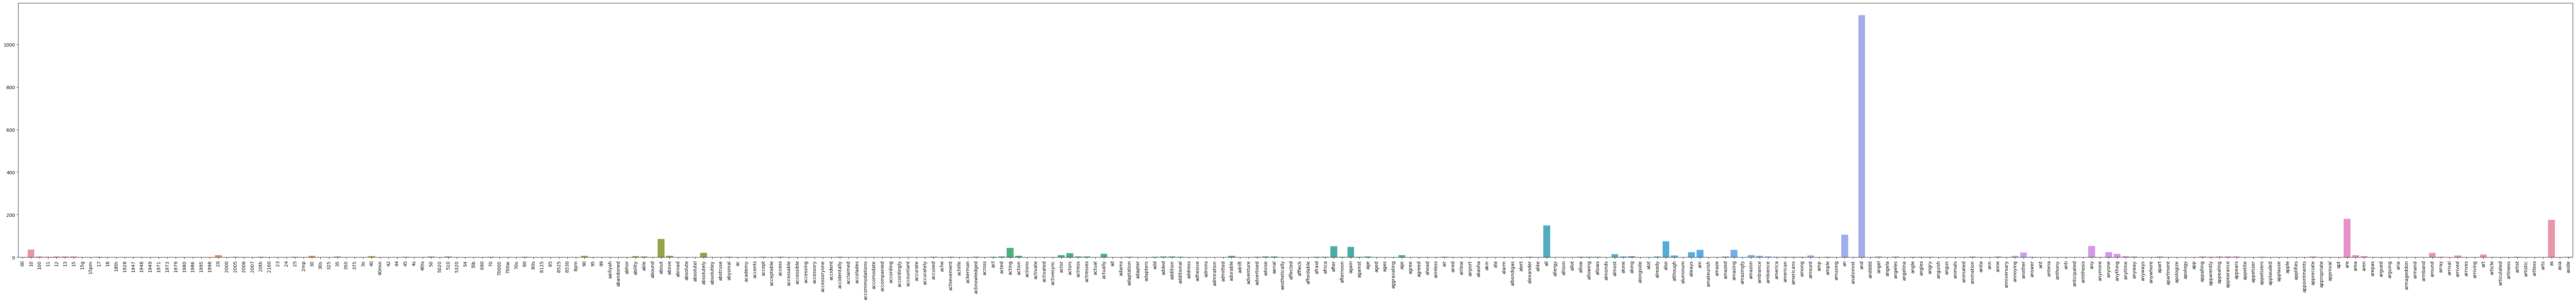

In [50]:
term_frequencies = []
print(merged_dataset_counts.shape[1])
for j in range(0,merged_dataset_counts.shape[1]):
    term_frequencies.append(sum(merged_dataset_counts[:,j].toarray()))

term_frequencies = np.asarray(merged_dataset_counts.sum(axis=0))[0]

term_frequencies[0] #sum of first term: 00

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Too sparse, not representative enough.

5155
[   1   80  116  122  123  127  156  187  196  197  201  235  245  246
  274  283  289  317  345  351  352  353  392  412  423  438  445  448
  469  473  486  493  499  517  548  552  558  574  613  627  641  662
  666  667  670  692  697  713  721  738  749  762  764  766  768  780
  802  833  845  876  892  897  902  917  930 1021 1041 1071 1127 1154
 1155 1161 1193 1201 1231 1254 1262 1265 1266 1271 1287 1296 1297 1298
 1344 1345 1353 1366 1383 1428 1440 1441 1458 1459 1460 1480 1490 1524
 1527 1536 1538 1540 1566 1586 1589 1590 1629 1634 1656 1666 1684 1690
 1692 1699 1714 1715 1724 1729 1747 1752 1754 1764 1768 1769 1779 1851
 1872 1877 1898 1901 1908 1933 1955 1956 1968 1972 1988 2002 2086 2100
 2101 2116 2127 2130 2157 2169 2175 2185 2205 2223 2232 2234 2235 2243
 2246 2305 2330 2362 2395 2404 2434 2436 2467 2506 2517 2523 2534 2565
 2596 2602 2613 2617 2630 2632 2639 2648 2664 2669 2684 2686 2688 2689
 2701 2711 2717 2728 2755 2758 2764 2775 2804 2811 2826 2850 2858 2890
 

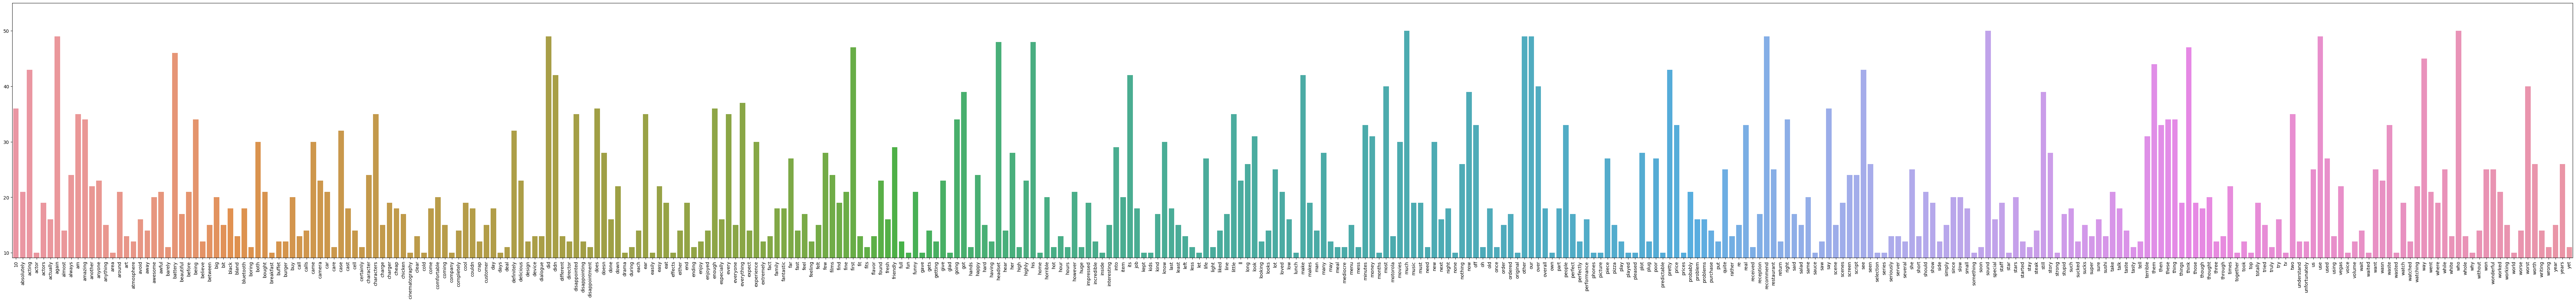

In [51]:
term_frequencies = []
print(merged_dataset_counts.shape[1])
for j in range(0, merged_dataset_counts.shape[1]):
    term_frequencies.append(sum(merged_dataset_counts[:,j].toarray()))

term_frequencies = np.asarray(merged_dataset_counts.sum(axis=0))[0]

survivor_index = np.intersect1d(np.where(term_frequencies <= 50), np.where(term_frequencies >= 10))
print(survivor_index)
survivor = term_frequencies[survivor_index]

print(len(survivor))

fig, ax = plt.subplots(figsize=(100, 10))
sns.barplot(x=count_vect.get_feature_names_out()[survivor_index], 
            y=survivor, ax=ax)
ax.set_xticklabels(count_vect.get_feature_names_out()[survivor_index], rotation = 90);
ax.set_ylim(10/1.1, 50*1.1)

plt.show()


I plot those term frequency larger than 10 but smaller than 50. By reducing the number of terms, to visualize the distribution more clearly.
I also change the starting value of y-axis to 10 / 1.1, let the figure more representive.

[1951 1138  789 ...    1    1    1]


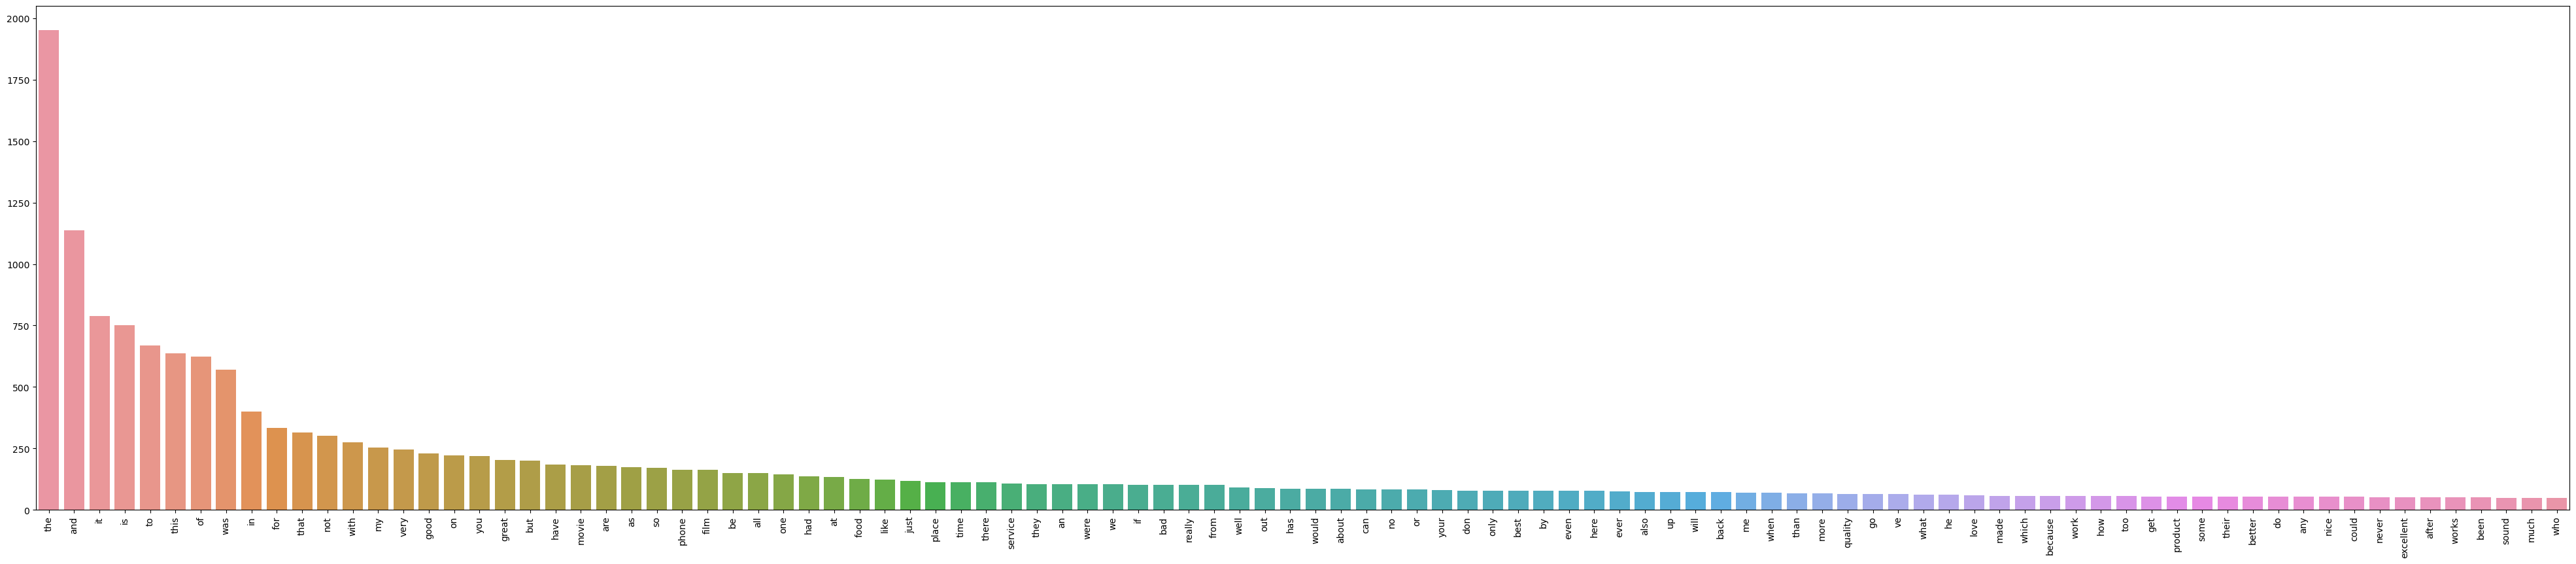

In [52]:

sort = np.argsort(-term_frequencies)
sortedx = count_vect.get_feature_names_out()[sort]
sortedy = term_frequencies[sort]
print(sortedy)
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=sortedx[:100], 
            y=sortedy[:100])
g.set_xticklabels(sortedx[:100], rotation = 90);



### 5.6 Discretization and Binarization

In [53]:

mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(merged_dataset.category)
merged_dataset['bin_category'] = mlb2.transform(merged_dataset['category']).tolist()
merged_dataset[0:15]


comment  category source  \
0   A very, very, very slow-moving, aimless movie ...         0   imdb   
1   Not sure who was more lost - the flat characte...         0   imdb   
2   Attempting artiness with black & white and cle...         0   imdb   
3         Very little music or anything to speak of.          0   imdb   
4   The best scene in the movie was when Gerardo i...         1   imdb   
5   The rest of the movie lacks art, charm, meanin...         0   imdb   
6                                  Wasted two hours.          0   imdb   
7   Saw the movie today and thought it was a good ...         1   imdb   
8                                 A bit predictable.          0   imdb   
9   Loved the casting of Jimmy Buffet as the scien...         1   imdb   
10                And those baby owls were adorable.          1   imdb   
11  The movie showed a lot of Florida at it's best...         1   imdb   
12  The Songs Were The Best And The Muppets Were S...         1   imdb   
13                                   It Was So Cool.          1   imdb   
14  This is a very "right on case" movie that deli...         1   imdb   

                                             unigrams bin_category  
0   [A, very, ,, very, ,, very, slow-moving, ,, ai...          [0]  
1   [Not, sure, who, was, more, lost, -, the, flat...          [0]  
2   [Attempting, artiness, with, black, &, white, ...          [0]  
3   [Very, little, music, or, anything, to, speak,...          [0]  
4   [The, best, scene, in, the, movie, was, when, ...          [1]  
5   [The, rest, of, the, movie, lacks, art, ,, cha...          [0]  
6                             [Wasted, two, hours, .]          [0]  
7   [Saw, the, movie, today, and, thought, it, was...          [1]  
8                            [A, bit, predictable, .]          [0]  
9   [Loved, the, casting, of, Jimmy, Buffet, as, t...          [1]  
10        [And, those, baby, owls, were, adorable, .]          [1]  
11  [The, movie, showed, a, lot, of, Florida, at, ...          [1]  
12  [The, Songs, Were, The, Best, And, The, Muppet...          [1]  
13                             [It, Was, So, Cool, .]          [1]  
14  [This, is, a, very, ``, right, on, case, '', m...          [1]

# 6. Data Exploration

In [54]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = merged_dataset.iloc[200]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = merged_dataset.iloc[300]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = merged_dataset.iloc[500]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['This is definitely one of the bad ones. ']
['I recommend this for EVERYONE who loves film, movies, anything...A Work of Art! ']
['I left the theater with a lilt in my step, joy in my heart and hope for the human race. ']


In [55]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [56]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.204124
Cosine Similarity using count bw 1 and 3: 0.144338
Cosine Similarity using count bw 2 and 3: 0.058926
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Part 3: Tasks on New Dataset

### 3-1 Generate Meaningful Visualization for New Dataset

#### 3-1-1 Wordcloud

By wordcloud, we can visualize those words that appear frequently in comments. Larger words mean more appearance.

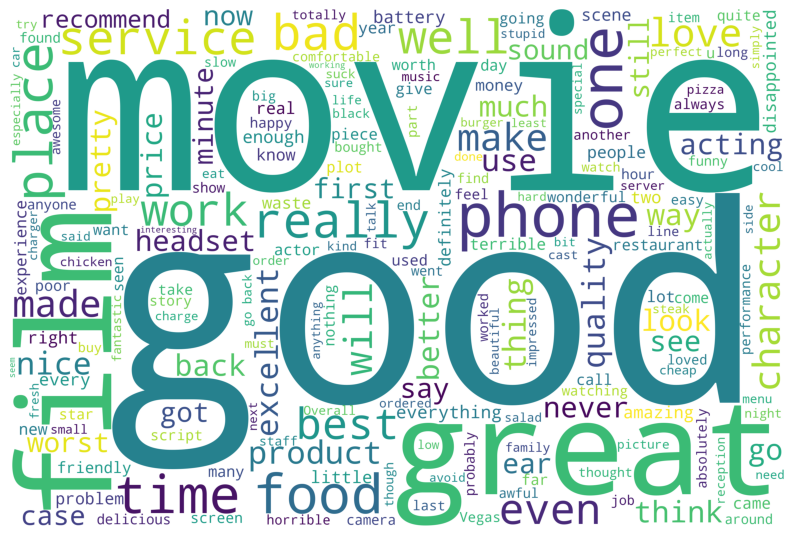

In [57]:
from wordcloud import WordCloud, STOPWORDS

wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(merged_dataset['comment']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

The wordcloud from positive comments.

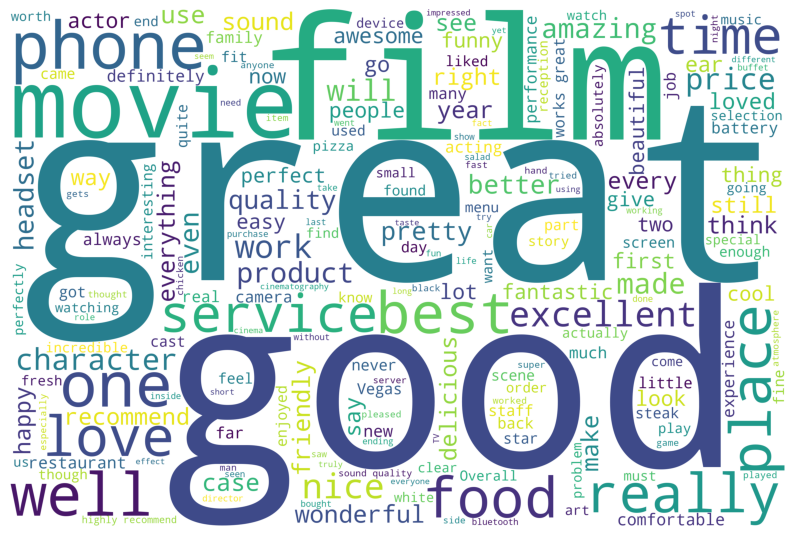

In [58]:
from wordcloud import WordCloud, STOPWORDS

wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(merged_dataset[merged_dataset['category'] == 1]['comment']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

The wordcloud from negative comments.

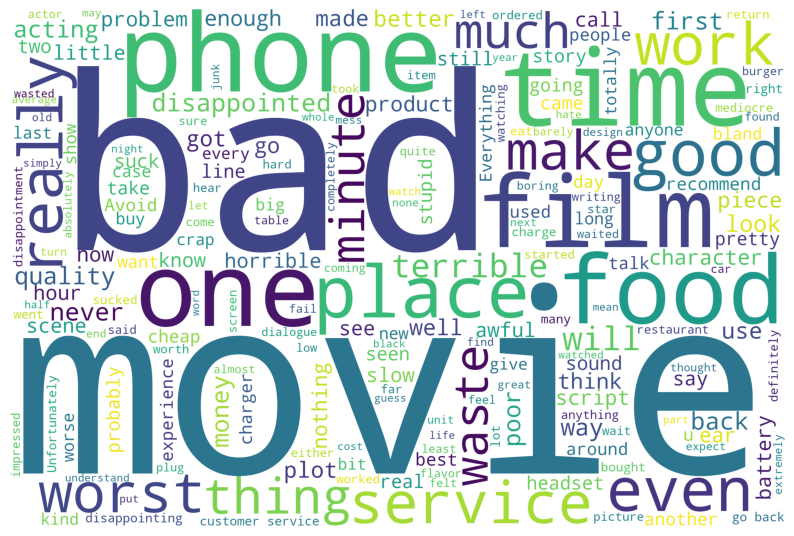

In [59]:
from wordcloud import WordCloud, STOPWORDS

wordcloud_df = WordCloud(width=3000,height=2000,background_color='white').generate(' '.join(merged_dataset[merged_dataset['category'] == 0]['comment']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_df)
plt.axis("off")
plt.show()

#### 3-1-2


The wordclouds above show those words that appear frequently in positive or negative comment, but some words like 'food', 'phone' appear in both category. I want to plot a figure that shows those word that have different possibility in each category. Thus, if a word appear in a positive comment, I give this word 1 point, if a word appear in a negative comment then minus 1 point. By sorting the scores of words,  
`those words that have higher score means these words appear in positive comment a lot but not so many in negative comment`.

In [60]:
# calculating the scores, may need around 5 minutes.

score = [0 for _ in range(merged_dataset_counts.shape[1])]
for i in range(merged_dataset_counts.shape[1]):
    for j in range(merged_dataset_counts.shape[0]):
        if merged_dataset_counts[j, i]:
            if merged_dataset.category[j] == 0:
                score[i] -= 1
            else:
                score[i] += 1

print(score[:10])
print(score[-10:])

[-1, 5, 1, -2, -2, -3, 1, -1, -1, -2]
[-1, 1, -1, 2, -1, 1, -5, -1, -2, -1]


In [61]:
score = np.array(score)
sort = np.argsort(-score)
score2 = score[sort]
print(sort)
print(score)
print(score2)
print(count_vect.get_feature_names_out())
print(count_vect.get_feature_names_out()[sort])

[2023  216 1993 ... 4968  373 3063]
[-1  5  1 ... -1 -2 -1]
[ 177  173  113 ...  -47  -84 -182]
['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']
['great' 'and' 'good' ... 'was' 'bad' 'not']


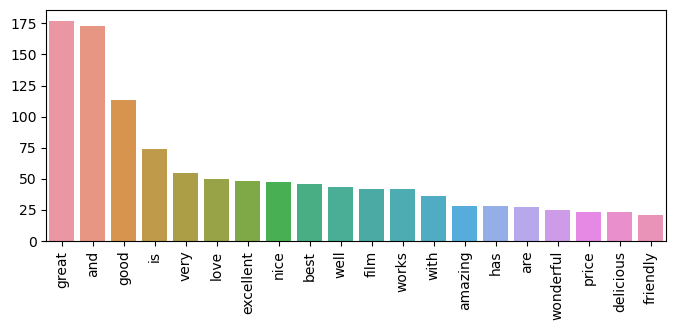

In [62]:

plt.subplots(figsize=(8, 3))
g = sns.barplot(x=count_vect.get_feature_names_out()[sort][0:20], 
            y=score2[0:20])
g.set_xticklabels(count_vect.get_feature_names_out()[sort][0:20], rotation = 90);

Those words that appear in positive comment a lot but not so many in negative comment.

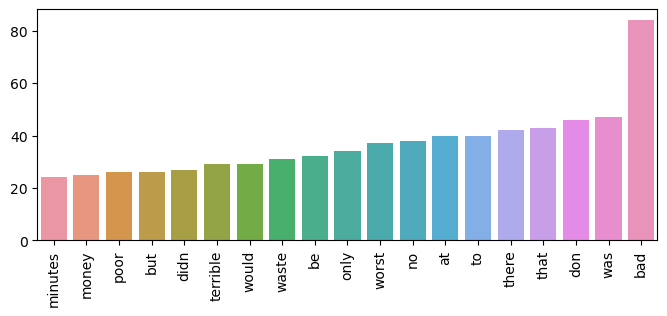

In [63]:
plt.subplots(figsize=(8, 3))
g = sns.barplot(x=count_vect.get_feature_names_out()[sort][-20:-1], 
            y= -1 * score2[-20:-1])
g.set_xticklabels(count_vect.get_feature_names_out()[sort][-20:-1], rotation = 90);

Those words that appear in negative comments a lot but not so many in positive comments.

### 3-2 Generate TD-IDF Features from the Tokens of each Text.

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()
merged_dataset_tfidf = tfidf_vector.fit_transform(merged_dataset.comment)
print(merged_dataset_tfidf.shape)
merged_dataset_tfidf
tfidf = pd.DataFrame(merged_dataset_tfidf.toarray(), columns=tfidf_vector.get_feature_names_out())
tfidf

(2983, 5155)


00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2978  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2979  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2980  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2981  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2978  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2979  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2980  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2981  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2982  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2983 rows x 5155 columns]

In [65]:
analyze = tfidf_vector.build_analyzer()
merged_dataset_tfidf[0:2, 0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

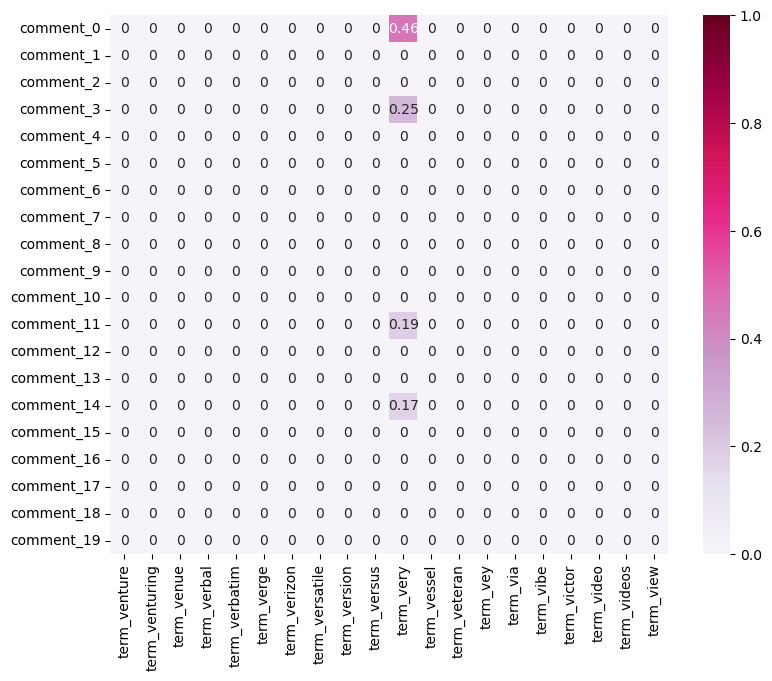

In [66]:
plot_x = ["term_"+str(i) for i in tfidf_vector.get_feature_names_out()[4880:4900]]
plot_x

plot_y = ["comment_"+ str(i) for i in list(merged_dataset.index)[0:20]]
plot_y

plot_z = merged_dataset_tfidf[0:20, 4880:4900].toarray()
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Try to plot the tfidf vector.

In [67]:
merged_dataset_tfidf.shape

(2983, 5155)

['doc_1908', 'doc_1822', 'doc_2773', 'doc_1974', 'doc_1923', 'doc_1135', 'doc_917', 'doc_551', 'doc_600', 'doc_456']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['term_the', 'term_and', 'term_easily', 'term_my', 'term_it', 'term_bad', 'term_is', 'term_poised', 'term_forgotten', 'term_falls']
[[0.0, 0.0, 0.0, 0.0, 0.23323105313341178, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5765082300151815, 0.0, 0.0, 0.0, 0.38422663245180194, 0.0], [0.2165986221617039, 0.12912049655601088, 0.0, 0.2144639001815293, 0.0, 0.0, 0.15091250761402014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29189338335719583, 0.0, 0.0, 0.0, 0.5452052824520541], [0.0, 0.0, 0.5540778145082315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6631025429865013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37864068249333904, 0.0, 0.0, 0.0], [0.23412366362022932, 0.09304510927617331, 0.0, 0.0, 0.1078346090835608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

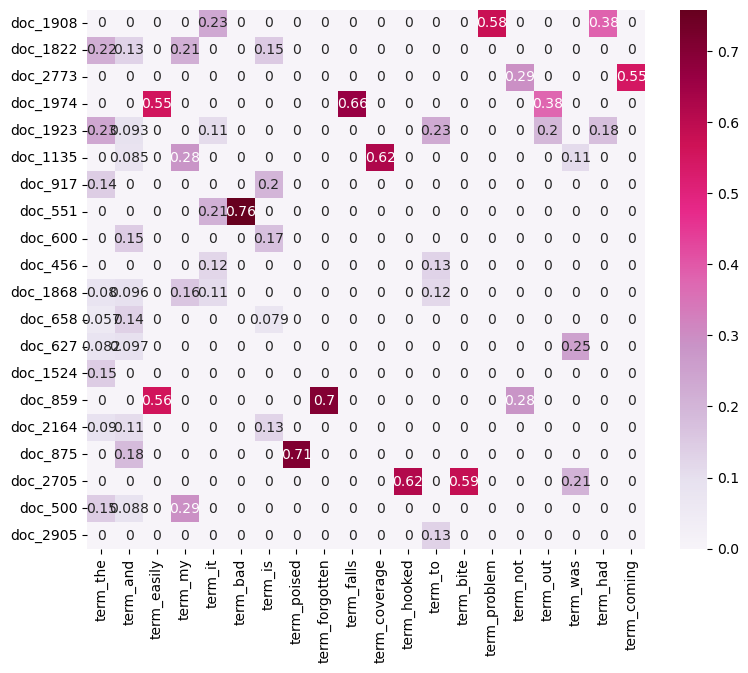

In [68]:
doc_sample = pd.DataFrame()

doc_sample = pd.concat([doc_sample, merged_dataset[merged_dataset['category'] == 0].sample(n = 10, random_state=42)]) # sample 7 from each categories
doc_sample = pd.concat([doc_sample, merged_dataset[merged_dataset['category'] == 1].sample(n = 10, random_state=42)])


plot_y = ["doc_"+ str(i) for i in doc_sample.index]
print(plot_y[:10])

term_frequencies = [0 for _ in range(merged_dataset_tfidf.shape[1])]
for i in doc_sample.index:
    for j in range(merged_dataset_tfidf.shape[1]):
        term_frequencies[j] += merged_dataset_tfidf[i, j] # counting the appearence of every words within 20 samples

print(term_frequencies[:10])

term_frequencies = np.array(term_frequencies) 
sort = np.argsort(-term_frequencies) # sorting by the appearance
term_frequencies = term_frequencies[sort]

plot_x = ["term_"+str(i) for i in tfidf_vector.get_feature_names_out()[sort]][0:20] # top 20 appearance
print(plot_x[:10])

plot_z = [[0 for _ in range(20)] for _ in range(20)]
for i in range(20):
    for j in range(20):
        plot_z[j][i] = merged_dataset_tfidf[doc_sample.index[j], sort[i]]
print(plot_z[:10])

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=np.amax(plot_z), annot=True)

Try to plot the tfidf vector by the frequency of appearance.

## 3.3 Implement a simple Naive Bayes classifier that automatically classifies the records into their categories
### 3.3.1 Word frequency features

In [69]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dv = DictVectorizer(sparse=False)
split = int(0.8*len(merged_dataset.index)) # split the dataset to 8:2 to prevent overfitting

word_fre_dataset = pd.DataFrame(merged_dataset_counts.toarray(), columns=count_vect.get_feature_names_out())
word_fre_dataset

MNB = MultinomialNB()
MNB.fit(word_fre_dataset[:split], merged_dataset['category'][:split])

pred = MNB.predict(word_fre_dataset[:split])
result = np.array(merged_dataset['category'][:split])
accuracy = accuracy_score(result, pred)
confusion = confusion_matrix(result, pred)
report = classification_report(result, pred)
print("Below is word frequency train accuracy:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

pred = MNB.predict(word_fre_dataset[split:])
result = np.array(merged_dataset['category'][split:])
accuracy = accuracy_score(result, pred)
confusion = confusion_matrix(result, pred)
report = classification_report(result, pred)
print("Below is word frequency test accuracy:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Below is word frequency train accuracy:
Accuracy: 0.9538977367979883
Confusion Matrix:
 [[1129   44]
 [  66 1147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1173
           1       0.96      0.95      0.95      1213

    accuracy                           0.95      2386
   macro avg       0.95      0.95      0.95      2386
weighted avg       0.95      0.95      0.95      2386

Below is word frequency test accuracy:
Accuracy: 0.8107202680067002
Confusion Matrix:
 [[254  66]
 [ 47 230]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       320
           1       0.78      0.83      0.80       277

    accuracy                           0.81       597
   macro avg       0.81      0.81      0.81       597
weighted avg       0.81      0.81      0.81       597



### 3.3.2 TF-IDF Naive Bayes

In [70]:
MNB = MultinomialNB()
MNB.fit(merged_dataset_tfidf[:split], merged_dataset['category'][:split])

pred = MNB.predict(merged_dataset_tfidf[:split])
result = np.array(merged_dataset['category'][:split])
accuracy = accuracy_score(result, pred)
confusion = confusion_matrix(result, pred)
report = classification_report(result, pred)
print("Below is TF-IDF train accuracy:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

pred = MNB.predict(merged_dataset_tfidf[split:])
result = np.array(merged_dataset['category'][split:])
accuracy = accuracy_score(result, pred)
confusion = confusion_matrix(result, pred)
report = classification_report(result, pred)
print("Below is TF-IDF train accuracy:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Below is TF-IDF train accuracy:
Accuracy: 0.960184409052808
Confusion Matrix:
 [[1131   42]
 [  53 1160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1173
           1       0.97      0.96      0.96      1213

    accuracy                           0.96      2386
   macro avg       0.96      0.96      0.96      2386
weighted avg       0.96      0.96      0.96      2386

Below is TF-IDF train accuracy:
Accuracy: 0.7989949748743719
Confusion Matrix:
 [[243  77]
 [ 43 234]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       320
           1       0.75      0.84      0.80       277

    accuracy                           0.80       597
   macro avg       0.80      0.80      0.80       597
weighted avg       0.80      0.80      0.80       597



## Part 4: Improving Inefficent Parts

### In the following paragraph, I am going to provide some parts that I think aren't efficient enough while processing the data.

1. When we processing those files, we vectorized every words not only noun, verbs and adjective but also article, auxiliary verb, pronoun, counjuction or preposition. I think the former types are more likely to represent the category of an email or the sentiment of a comment while those latter types are much more meaningless. For example, no matter what's the category or sentiment, the strings often including some words like `'the'`, `'a'`, `'is'`, `'and'`, etc. I think to analyze these meaningless terms is nonsense and a waste of computational resources. I think we should skip these terms when visualizing the data or training a classifier, may make the figure more interpretive and increase the accuracy of the classifiers.

2. The `X_counts` matrix is too sparse, cause so many waste of time and memory, should try other data structure to represent it.

3. We use `count_vect.get_feature_names_out()` function many times to get word terms out. But I think we should use a list to store these terms in order not to call this function everytime.